<a href="https://colab.research.google.com/github/datasriram/task-3-linear-regression/blob/main/linear_regression_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression Results:
MAE: 38341.204476421066
MSE: 3418946311.180807
R² Score: 0.5542632452871117


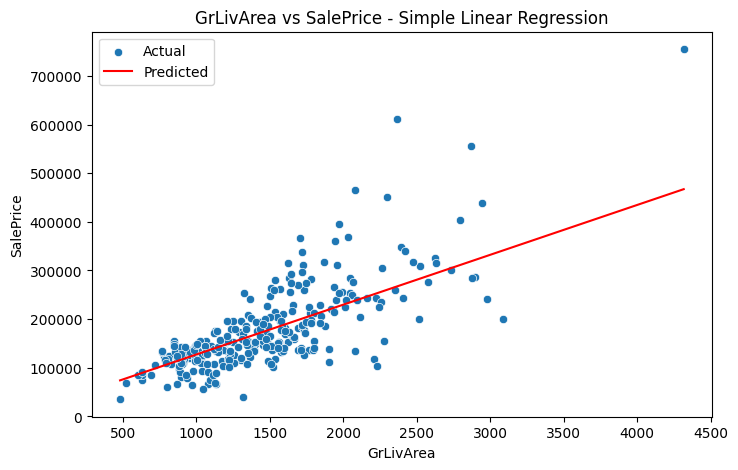

Multiple Linear Regression Results:
MAE: 28121.52415174796
MSE: 1851765974.9690485
R² Score: 0.7585805446926186

Feature Coefficients:
              Coefficient
OverallQual  26772.489834
GrLivArea       47.228505
GarageCars   22239.459898


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  STEP 2: Load Dataset from GitHub
url = "https://raw.githubusercontent.com/datasriram/task-3-linear-regression/main/train.csv"
df = pd.read_csv(url)
df.head()


# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)

# Simple Linear Regression: GrLivArea vs SalePrice
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Simple Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plotting
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual')
sns.lineplot(x=X_test['GrLivArea'], y=y_pred, color='red', label='Predicted')
plt.title("GrLivArea vs SalePrice - Simple Linear Regression")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

# Multiple Linear Regression
features = ['OverallQual', 'GrLivArea', 'GarageCars']
X_multi = df[features]
y_multi = df['SalePrice']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)
y_pred_m = multi_model.predict(X_test_m)

print("Multiple Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))

# Coefficients
coeff_df = pd.DataFrame(multi_model.coef_, index=features, columns=["Coefficient"])
print("\nFeature Coefficients:")
print(coeff_df)

# New Section